In [1]:
import numpy as np
import pandas as pd

import time, os, sys, re, glob
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from cellpose import utils, io
from cellpose import io
from cellpose import plot
from cellpose import models

import skimage
import skimage.io as io
from skimage.io import imread

from course_functions import random_cmap
cmap = random_cmap()



use_GPU = models.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

TORCH CUDA version not installed/working.
>>> GPU activated? 0


## Path to data

In [9]:
datapath = "./"
folder = datapath + "test"

print(os.path.realpath(datapath))
print(os.path.realpath(folder))


C:\Users\pv20q838\Jupyter\Laura_bovine
C:\Users\pv20q838\Jupyter\Laura_bovine\test


## Images that need to be segmented 


In [10]:
to_segment = np.sort(glob.glob(folder +'/C3*.tif'))

[print(f) for f in to_segment]
print(len(to_segment))

imgs = [skimage.io.imread(f) for f in to_segment]


./test\C3-MAX_B_2_33_ICV_C_01_R3D_D3D.tif
./test\C3-MAX_B_2_33_ICV_C_02_R3D_D3D.tif
2


In [11]:
nimg = len(imgs)
print(nimg)

2


## (facultative) : Edge detection followed by median filter

In [8]:
def filter_image (image):
        
    image_gradienth = skimage.filters.sobel_h(image)
    image_gradientv = skimage.filters.sobel_v(image)
    image_gradient = np.sqrt(image_gradientv**2+image_gradienth**2)

    # Median filter here if necessary
    image_median = skimage.filters.median(image_gradient,selem=skimage.morphology.disk(3))
    
    return image_median
    

In [9]:
filtered = [filter_image (idx) for idx in imgs]

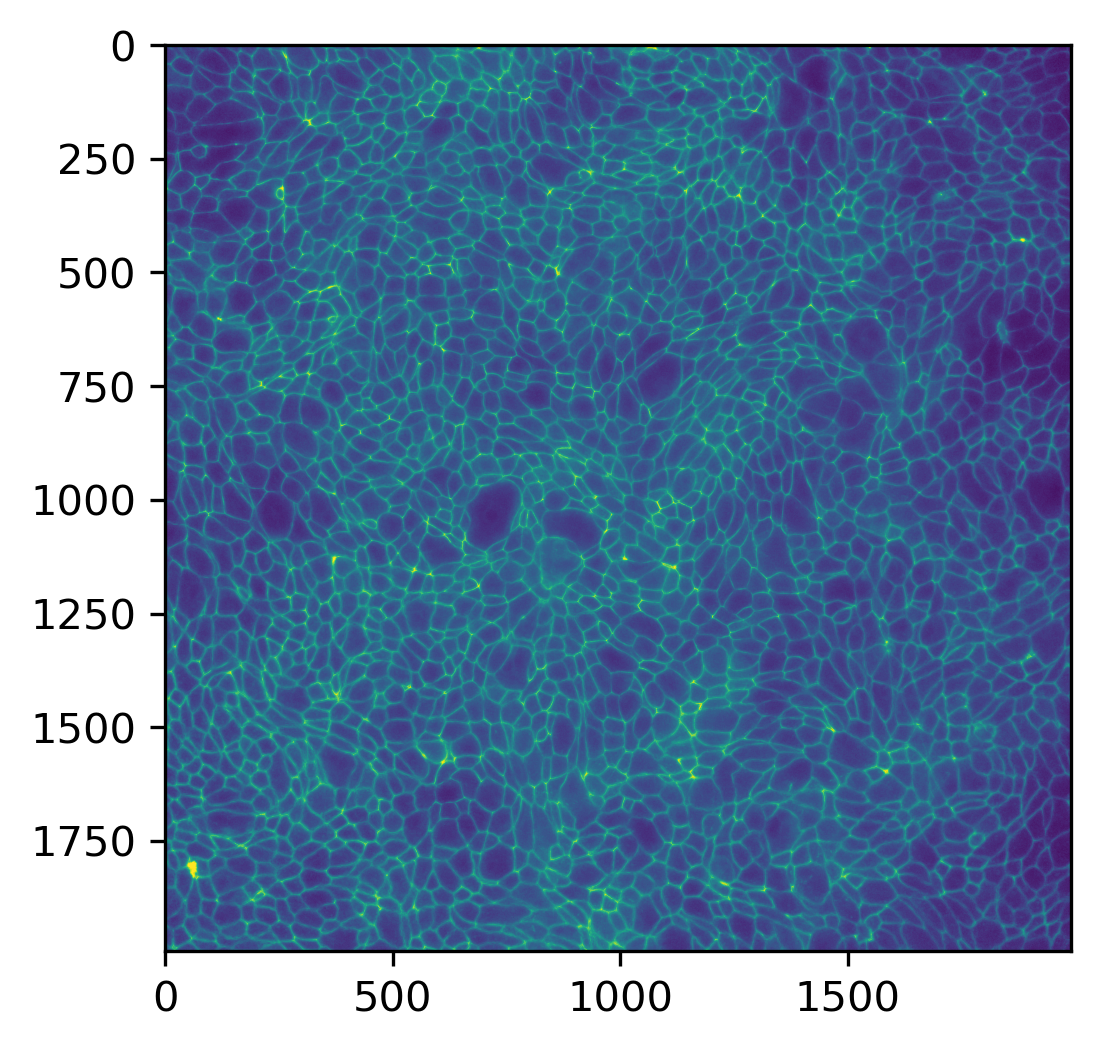

In [12]:
x = 1
plt.imshow(imgs[x])
#plt.imshow(filtered[x])

## CellPose

In [12]:
# RUN CELLPOSE

from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
# model = models.Cellpose(gpu=True, model_type='cyto')
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [0,0]

# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
# channels = [[0,0], [2,3], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs, diameter=None, flow_threshold=None, channels=channels)


>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 2 image(s)


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

computing styles from images


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:21<00:00, 10.98s/it]


time spent: running network 14.09s; flow+mask computation 7.63
estimated cell diameters for 2 image(s) in 88.49 sec
>>> diameter(s) =  [60.46048902 69.94585713]


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:29<00:00, 44.71s/it]

time spent: running network 76.86s; flow+mask computation 12.56
estimated masks for 2 image(s) in 89.63 sec
>>>> TOTAL TIME 178.12 sec


In [14]:
# save results as _seg.npy

from cellpose import io
io.masks_flows_to_seg(imgs, masks, flows, diams, to_segment, channels)